Importing


In [89]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import kagglehub
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Data Collection and processing

In [90]:
#loading the csv data to Panda Datafiles

# Download latest version
heart_data_path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

# Find the CSV file within the downloaded directory
for filename in os.listdir(heart_data_path):
    if filename.endswith(".csv"):
        heart_data_file = os.path.join(heart_data_path, filename)
        break  # Stop searching after finding the first CSV file

# Load the data into a pandas DataFrame using the found CSV file path
heart_data = pd.read_csv(heart_data_file)
#heart_data = pd.read_csv('/content/heart_disease_data.csv')


In [91]:
#print First 5 rows od data sets
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [92]:
#last 5 rows
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [93]:
# number of rows and column in data sets
heart_data.shape

(1025, 14)

In [94]:
# getting Some more info about dataset
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [95]:
# checking for missing values
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [96]:
# Statistical measure about data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [97]:
# Checking target Variable
heart_data['target'].value_counts()


,count
target,
1,526
0,499


1--> Defective heart
0--> Healthy Heart

Splitting the Features and Target

In [98]:
x = heart_data.drop(columns='target', axis=1)
y = heart_data['target']

In [99]:
print(x)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [100]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


Splitting The Tet and Training data

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)


In [102]:
print(x.shape, x_train.shape, x_test.shape)


(1025, 13) (820, 13) (205, 13)


Model Training

Logistic Regression

In [103]:
model = LogisticRegression()

In [104]:
# Training
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

In [105]:
# Accuracy On Training Data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [106]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8524390243902439


In [107]:
# Accuracy On Training Data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [108]:
print('Accuracy on Testing data : ', test_data_accuracy)

Accuracy on Testing data :  0.8048780487804879


Building a Predictive System

In [109]:
input_data = (46,1,0,140,311,0,1,120,1,1.8,1,2,3)

 #changing input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

 # reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
 print('The Person does not have a Heart Disease')
else:
 print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


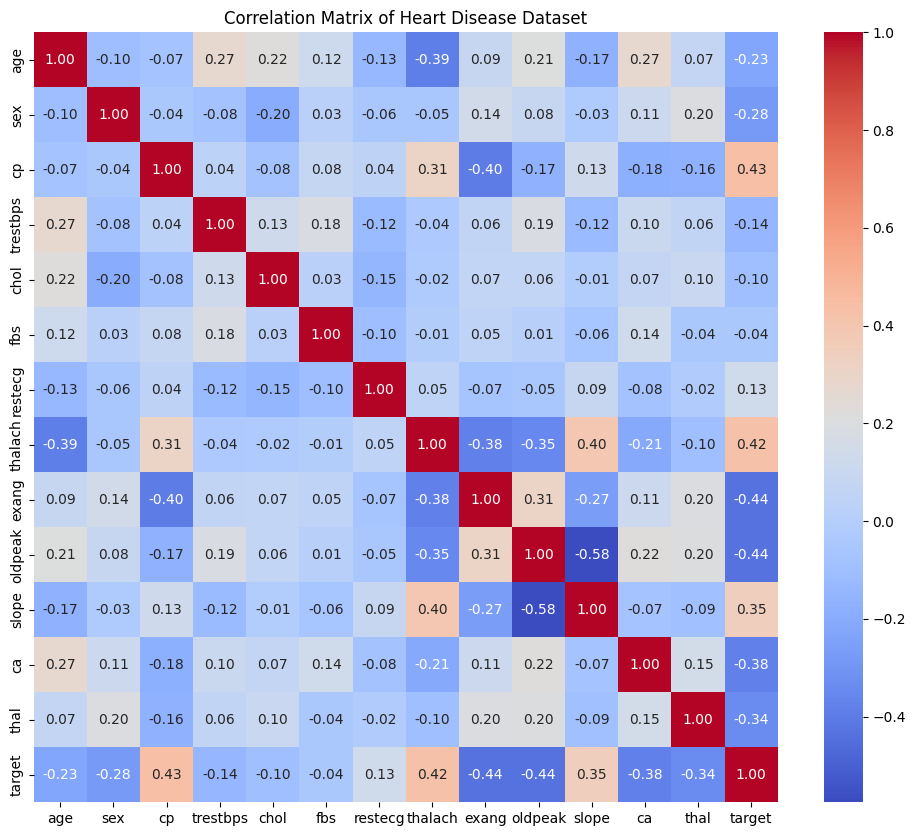

In [110]:
plt.figure(figsize=(12, 10))  # Set figure size
sns.heatmap(heart_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")  # Create heatmap
plt.title("Correlation Matrix of Heart Disease Dataset")  # Set title
plt.show()  # Display the plot

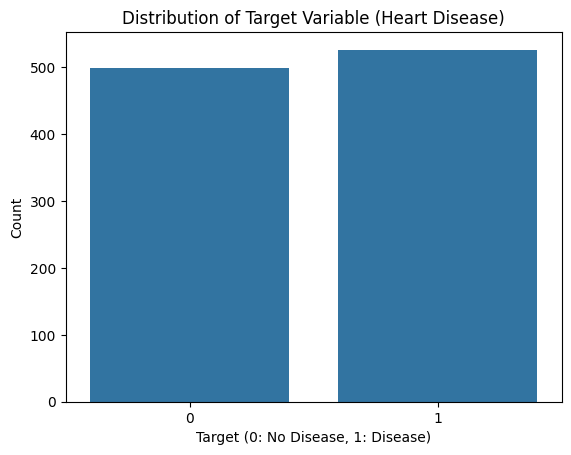

In [111]:
sns.countplot(x='target', data=heart_data)  # Create countplot
plt.title("Distribution of Target Variable (Heart Disease)")  # Set title
plt.xlabel("Target (0: No Disease, 1: Disease)")  # Set x-axis label
plt.ylabel("Count")  # Set y-axis label
plt.show()  # Display the plot

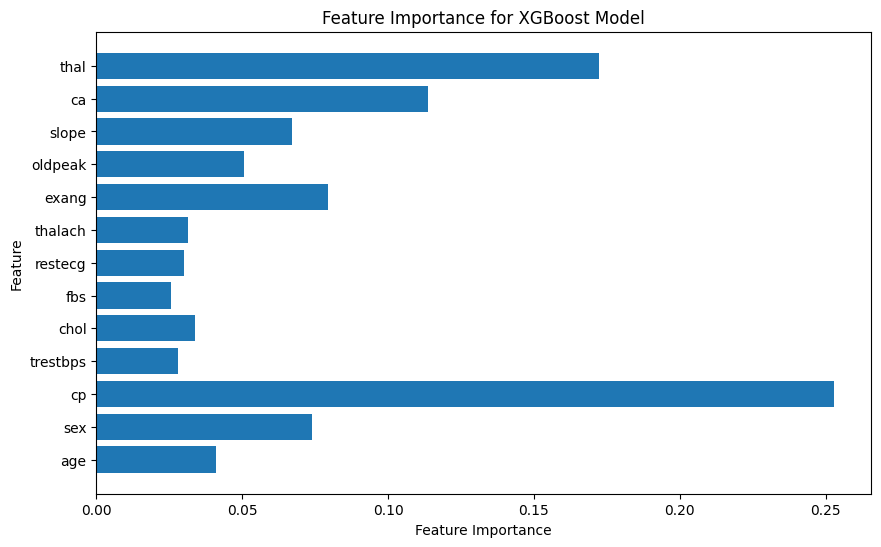

In [112]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x, y)
feature_importance = xgb_model.feature_importances_  # Get feature importances
feature_names = x.columns  # Get feature names

plt.figure(figsize=(10, 6))  # Set figure size
plt.barh(feature_names, feature_importance)  # Create horizontal bar plot
plt.xlabel("Feature Importance")  # Set x-axis label
plt.ylabel("Feature")  # Set y-axis label
plt.title("Feature Importance for XGBoost Model")  # Set title
plt.show()  # Display the plot

Saving The Model



In [113]:
import pickle

In [114]:
Classifier = model

In [115]:
filename = 'heart_disease_model.sav'
pickle.dump(Classifier, open(filename, 'wb'))

In [116]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

   # Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}

   # Create a GridSearchCV object
grid = GridSearchCV(SVC(), param_grid, cv=5)

   # Fit the grid search to your training data
grid.fit(x_train, y_train)

   # Get the best hyperparameters and model
best_params = grid.best_params_
best_svm_model = grid.best_estimator_

   # Evaluate the model
y_pred = best_svm_model.predict(x_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.824390243902439
Precision: 0.776
Recall: 0.9238095238095239
F1 Score: 0.8434782608695652


Comparison With Other Models

In [117]:
logreg_model = LogisticRegression()
logreg_model.fit(x_train, y_train)
logreg_predictions = logreg_model.predict(x_test)

# 2. Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
dt_predictions = dt_model.predict(x_test)

# 3. Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_predictions = rf_model.predict(x_test)

# 4. Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(x_train, y_train)
svm_predictions = svm_model.predict(x_test)

# 5. XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)
xgb_predictions = xgb_model.predict(x_test)

# 6. LightGBM
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(x_train, y_train)
lgb_predictions = lgb_model.predict(x_test)

# Evaluation Metrics for Comparison
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'XGBoost', 'LightGBM']
predictions = [logreg_predictions, dt_predictions, rf_predictions, svm_predictions, xgb_predictions, lgb_predictions]

for i in range(len(models)):
    print(f"Model: {models[i]}")
    print(f"Accuracy: {accuracy_score(y_test, predictions[i])}")
    print(f"Precision: {precision_score(y_test, predictions[i])}")
    print(f"Recall: {recall_score(y_test, predictions[i])}")
    print(f"F1-Score: {f1_score(y_test, predictions[i])}")
    print("-" * 20)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 421, number of negative: 399
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 820, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513415 -> initscore=0.053671
[LightGBM] [Info] Start training from score 0.053671
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Model: Logistic Regression
Accuracy: 0.8048780487804879
Precision: 0.768595041322314
Recall: 0.8857142857142857
F1-Score: 0.8230088495575221

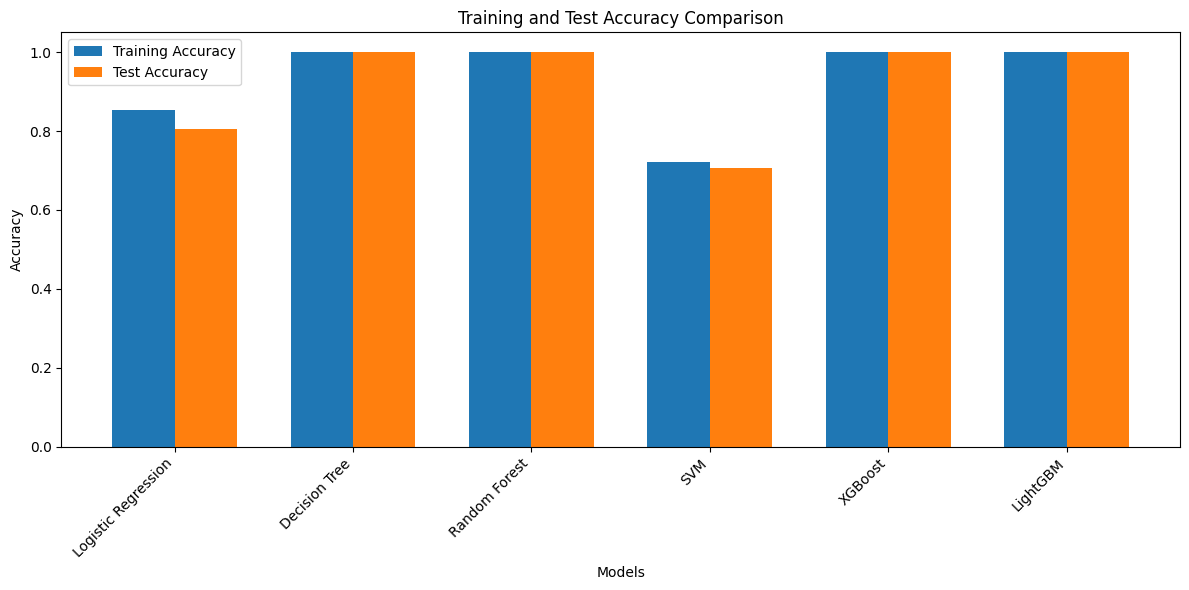

In [118]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'XGBoost', 'LightGBM']
training_accuracies = [logreg_model.score(x_train, y_train), dt_model.score(x_train, y_train),
                       rf_model.score(x_train, y_train), svm_model.score(x_train, y_train),
                       xgb_model.score(x_train, y_train), lgb_model.score(x_train, y_train)]
test_accuracies = [logreg_model.score(x_test, y_test), dt_model.score(x_test, y_test),
                    rf_model.score(x_test, y_test), svm_model.score(x_test, y_test),
                    xgb_model.score(x_test, y_test), lgb_model.score(x_test, y_test)]

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
index = np.arange(len(models))

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(index, training_accuracies, bar_width, label='Training Accuracy')
plt.bar(index + bar_width, test_accuracies, bar_width, label='Test Accuracy')

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Comparison')
plt.xticks(index + bar_width / 2, models, rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()

# Display the plot
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()